## Задача № 1. Friction coefficient ($\mu$) estimation

In [1]:
import numpy as np
import torch.nn as nn
from Agents.CCEM import CCEM
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import UniformNoise
from Solvers import OneAgentSolver as solver
from Environments.ArrivalCar.ArrivalCar import ArrivalCar
from Environments.ArrivalCar.ArrivalCarVisualizer import ArrivalCarVisualizer

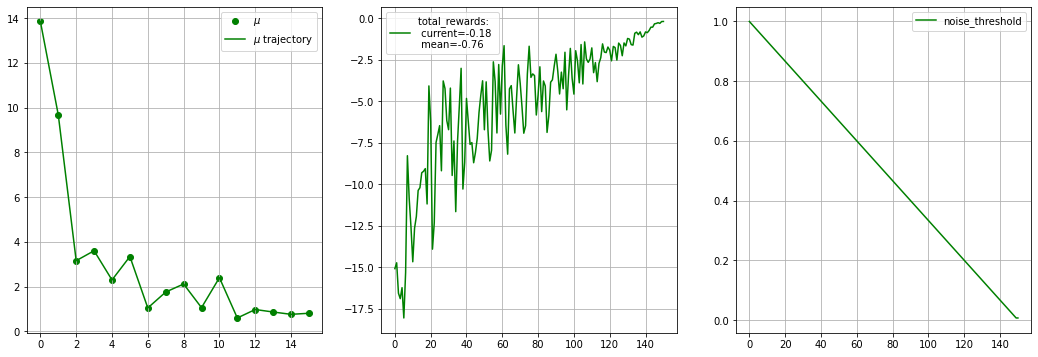

Given mu is 0.9 and predicted mu is 0.8933324813842773


In [2]:
env = ArrivalCar(dt=1, inner_dt=0.1)
given_mu = 0.9
env.get_test_trajectory(given_mu)

pi_model = SequentialNetwork([env.state_dim, 32, env.action_dim], nn.ReLU(), nn.Tanh())
noise = UniformNoise(env.action_dim, threshold_decrease=1 / 150)
agent = CCEM(env.state_dim, env.action_dim, env.action_min, env.action_max, pi_model, noise,
                 percentile_param=80, tau=1e-2, pi_model_lr=1e-2, learning_iter_per_fit=16)

visualizer = ArrivalCarVisualizer(waiting_for_show=10)
solver.go(env, agent, episode_n=151, session_n=10, session_len=1, show=visualizer.show)

print(f'Given mu is {given_mu} and predicted mu is {agent.get_action(env.initial_state)[0]}')